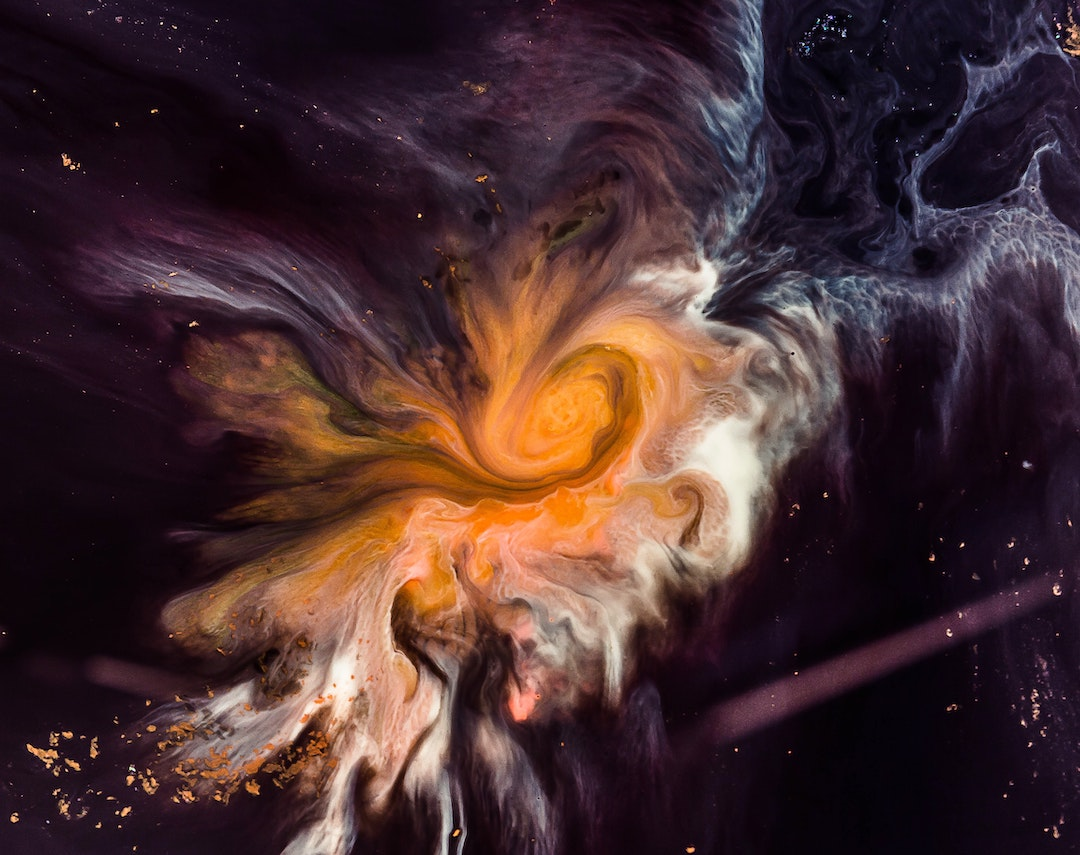



# About Spaceship Titanic
* The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

#### Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#### Loading dataset

In [ ]:
dataset=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
dataset.head()

In [ ]:
dataset.info()

#### Data Processing

In [ ]:
dataset.isnull().sum()

In [ ]:
#Replacing Age with mean
dataset['Age']=dataset['Age'].fillna(dataset['Age'].mean())
dataset

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
#convert 'CryoSleep' column to 0 or 1
dum_df= pd.get_dummies(dataset.CryoSleep,prefix="CryoSleep is")# merge with main dataset on key values
new_dataset=dataset.join(dum_df)
new_dataset

In [ ]:
dum_df1= pd.get_dummies(dataset.VIP,prefix="VIP is")# merge with main dataset on key values
new_dataset=new_dataset.join(dum_df1)
new_dataset

In [ ]:
dum_df1= pd.get_dummies(dataset.Transported,prefix="Transported is")# merge with main dataset on key values
new_dataset=new_dataset.join(dum_df1)
new_dataset

In [ ]:
new_dataset=new_dataset.drop(['Name','Cabin','VIP','Transported','CryoSleep'],axis=1)
new_dataset

In [ ]:
new_dataset['Transported']=new_dataset['Transported is_True']

In [ ]:
#Convert dtypes of HomePlanet and Destination to str

new_dataset['HomePlanet']=new_dataset['HomePlanet'].astype(str)
new_dataset['Destination']=new_dataset['Destination'].astype(str)

In [ ]:
X=new_dataset.drop(["HomePlanet","Destination","Transported is_False"],axis=1)
y=new_dataset["Transported"]

#### Training Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan', p = 5)
classifier1.fit(X_train, y_train)

In [ ]:
y_pred = classifier1.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
Prediction=pd.DataFrame({'Transported ':y_test})
Prediction.head()

In [ ]:
submission=pd.DataFrame({'Transported':Prediction["Transported"]})
submission.head()

In [ ]:
submission.to_csv('mysubmission.csv', index = False)
print("Your submission was successfully saved!")

In [ ]:
pd.read_csv('mysubmission.csv')